In [41]:
rna_enhancers_counts_path = "10X_PBMC/04_count/pbmc_granulocyte_sorted_10k_counts_per_cell.txt"
atac_counts_path = "10X_PBMC/ATAC/01_count_fragments/pbmc_granulocyte_sorted_10k_enhancer_counts.mtx"
atac_barcodes_path = "10X_PBMC/ATAC/01_count_fragments/pbmc_granulocyte_sorted_10k_barcodes.tsv"
atac_features_path = "10X_PBMC/ATAC/01_count_fragments/pbmc_granulocyte_sorted_10k_features.tsv"

# eRNA count matrix analysis

In [42]:
library(magrittr)
library(dplyr)
library(stringi)

In [43]:
setwd(here::here()) # set working directory to project root
getwd()


[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [44]:
library(data.table)

rna_enhancers <- data.table::fread(rna_enhancers_counts_path, header = TRUE, sep = "\t", data.table = FALSE)


In [45]:
rownames(rna_enhancers) <- rna_enhancers$gene
rna_enhancers$gene <- NULL
rna_enhancers[1:10, 1:10]
dim(rna_enhancers)

,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSR10_739T55,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,0,0,0,0,0,0,0,0,0
ENSR10_75K6Q4,0,0,0,0,0,0,0,0,0,0
ENSR10_75KNGK,0,0,0,0,0,0,0,0,0,0
ENSR10_75MJTZ,0,0,0,0,0,0,0,0,0,0


[1] 81246 11907

In [46]:
# unexpressed cells count
unexpr_cells = colSums(rna_enhancers==0)
paste0("unexpressed cells: ", sum(unexpr_cells==nrow(rna_enhancers))," out of ", ncol(rna_enhancers))
# unexpressed rows count
unexpr_rows = rowSums(rna_enhancers==0)
paste0("unexpressed eRNA: ", sum(unexpr_rows==ncol(rna_enhancers))," out of ", nrow(rna_enhancers))



[1] "unexpressed cells: 0 out of 11907"

[1] "unexpressed eRNA: 0 out of 81246"

In [ ]:
# precent of zeros in the matrix
print(paste0(" precent of zeros: ",sum(rna_enhancers == 0) / (nrow(rna_enhancers) * ncol(rna_enhancers))))



[1] " precent of zeros: 0.997858002577356"
[1] "number of cells with more than 0 counts: 11907"
[1] "number of eRNAs with more than 0 counts: 81246"


In [ ]:
# show first 100 sums of cells
colSums(rna_enhancers) %>% head(10)

AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
             419              207              306               61 
AAACAGCCACCAACCG AAACAGCCAGGATAAC AAACAGCCAGTAGGTG AAACAGCCAGTTTACG 
             236              123              647              141 
AAACAGCCATCCAGGT AAACATGCAAGGTCCT AAACATGCACCGGCTA AAACATGCACTTGTTC 
             337              130              252              120 
AAACATGCAGCAAGTG AAACATGCAGGGAGCT AAACCAACACAATGCC AAACCAACACTAAGAA 
              85              148              523              571 
AAACCAACAGGAACTG AAACCAACAGGATGGC AAACCAACATAATCCG AAACCAACATTGTGCA 
             368              136              494              392 
AAACCGAAGCTGGACC AAACCGAAGTGAGCAA AAACCGAAGTTGCGTG AAACCGCGTACTTCAC 
             326               85               84              791 
AAACCGCGTATGGTGC AAACCGCGTCTAACCT AAACCGGCACATTAAC AAACCGGCATAATCAC 
             111              324              404              395 
AAACCGGCATTAGCCA AAACGCGCACCTACTT AAACGCGCAGCAAGAT AAACGGATCATGGCTG 
             208              102              467              189 
AAACGGATCATTCATC AAACGGATCCACCCTG AAACGGATCCCATAGG AAACGGATCGGTAACT 
             148              127              197               50 
AAACGGATCGTTTCTG AAACGTACAAGTGTTT AAACGTACACAACAGG AAACGTACACAAGCCT 
              90              116               99              136 
AAACGTACAGCTAATT AAACGTACAGGGAGGA AAAGCAAGTCCTTTAA AAAGCAAGTGCTAGCG 
             120              129              389               79 
AAAGCAAGTGTAATAC AAAGCAAGTTAACGGC AAAGCACCAAATGCCC AAAGCACCACAATTAC 
             131              224              287              770 
AAAGCACCAGCCTTGG AAAGCACCATGGCCCA AAAGCACCATTGTGGC AAAGCCCGTATTGAGT 
             190              209              365              157 
AAAGCCCGTCACAGAC AAAGCCCGTCCTTTAA AAAGCCCGTGAGAAAC AAAGCCCGTGCTAGAC 
             585              354               99              305 
AAAGCCCGTGGAAGGC AAAGCCCGTGTTGCTT AAAGCCCGTTATCCTA AAAGCCCGTTGGTTGA 
             131               90              386              185 
AAAGCCGCACATAACT AAAGCCGCACTGACTA AAAGCCGCACTGGCTG AAAGCCGCAGGAACTG 
             604              112              153              311 
AAAGCCGCAGTTAAAG AAAGCCGCATAGACTT AAAGCCGCATAGCTTG AAAGCCGCATGCAACC 
             289               89               92              192 
AAAGCCGCATTAAGCT AAAGCCGCATTGTTGG AAAGCGGGTAAGGTCC AAAGCGGGTAGCCTCC 
             399              142              398              135 
AAAGCGGGTCATCCTG AAAGCGGGTGATCAGC AAAGCGGGTTAACACG AAAGCGGGTTCCGGGA 
             217               71              121              237 
AAAGCGGGTTGAATCG AAAGCGGGTTGCACAA AAAGCGGGTTTACCGT AAAGCTTGTCAATACG 
             106              146              154              149 
AAAGCTTGTCGACTAA AAAGCTTGTTAGAGGG AAAGGACGTCAATAGT AAAGGACGTCCTTCTC 
             162               90              352              225 
AAAGGACGTTGGATCA AAAGGAGCACAGAAAC AAAGGAGCACCTGTAA AAAGGAGCAGGTTAAA 
             103              212              104              122 
AAAGGAGCATTAAGTC AAAGGAGCATTGTCCT AAAGGAGCATTGTGAT AAAGGCTCAATCCTAG 
              56              136              292              235 
AAAGGCTCAATGCCCG AAAGGCTCACAACAAA AAAGGCTCACAGCCAT AAAGGCTCACCTACGG 
             126              141              294              338 
AAAGGCTCACTAGGTC AAAGGCTCACTTCACT AAAGGCTCAGGACACA AAAGGCTCAGGATAAC 
             342              347              120              271

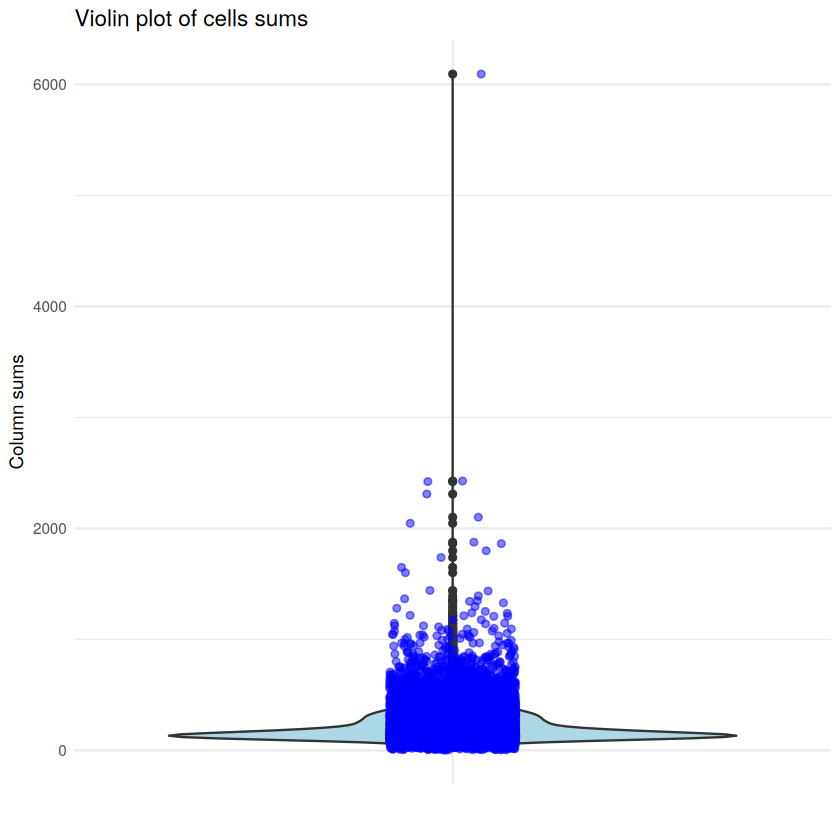

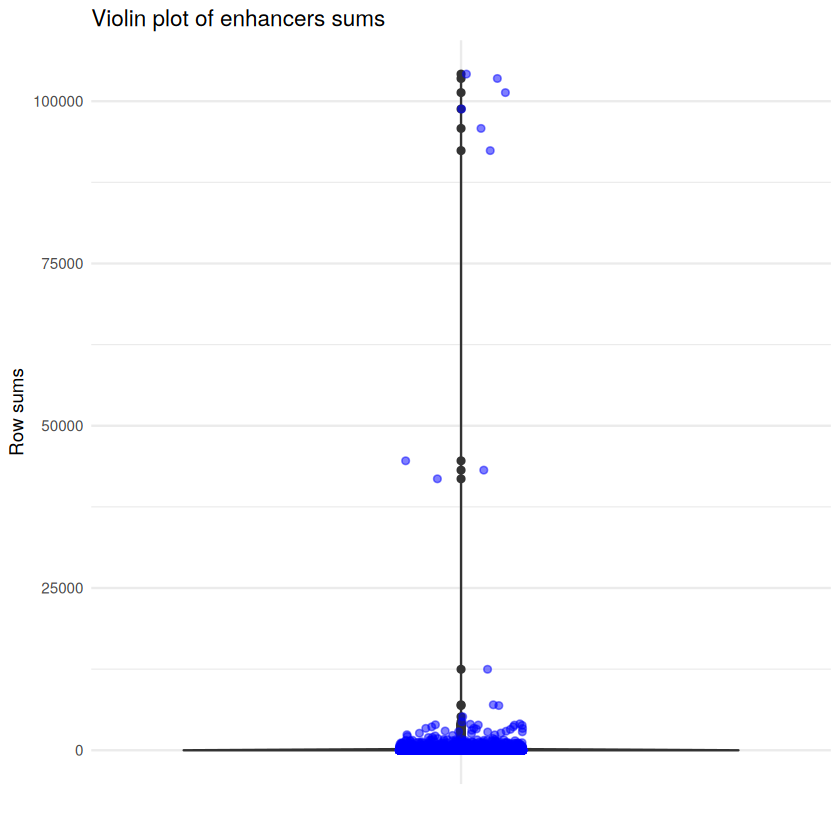

In [49]:
# violin plot of column sums with jittered points
data_cols = data.frame(sum = colSums(rna_enhancers))
library(ggplot2)
p = ggplot(data_cols, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of cells sums", x = "", y = "Column sums") +
  theme_minimal()

print(p)
# violin plot of row sums
data_rows = data.frame(sum = rowSums(rna_enhancers))
p = ggplot(data_rows, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of enhancers sums", x = "", y = "Row sums") +
  theme_minimal()
p


In [50]:
atac_counts <- Matrix::readMM(atac_counts_path) %>% as.matrix()


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 15.7 GiB”


In [51]:
atac_barcodes <- read.table(atac_barcodes_path)
atac_features <- read.table(atac_features_path)
rownames(atac_counts) <- atac_features$V1
colnames(atac_counts) <- atac_barcodes$V1 %>% gsub("-1$", "", .)
atac_counts[1:10, 1:10]
dim(atac_counts)

,CGTTAAATCCACCCTG,TTGCGTCTCGCCTAAG,TAGTAAGCAAGGTAAC,TATGGGCGTTATAGCG,GCCAATTAGGCGGGTA,TTTGACCGTCGTTACT,CGCCTGTGTGCACGCA,CTGGTTACATGTTTGG,CAAGTTATCCGCACAA,GCATTGCCATCACAGC
ENSR1_986,0,0,0,0,0,0,0,0,0,0
ENSR1_B5Q,0,0,0,0,0,0,0,0,0,0
ENSR1_B6N,0,0,0,0,0,0,0,0,0,0
ENSR1_9F7,0,0,0,0,0,0,0,0,0,0
ENSR1_84XG,0,0,0,0,0,0,0,0,0,0
ENSR1_854C,0,0,0,0,0,0,0,0,0,0
ENSR1_93WT,0,0,0,0,0,0,0,0,0,0
ENSR1_B32Q,0,0,0,0,0,0,0,0,0,0
ENSR1_B33F,0,0,0,0,0,0,0,0,0,0
ENSR1_B34B,0,0,0,0,0,0,0,0,0,0


[1] 177340  11909

In [52]:
common_ernas = intersect(rownames(rna_enhancers), rownames(atac_counts))
length(common_ernas)
common_cells = intersect(colnames(rna_enhancers), colnames(atac_counts))
length(common_cells)

[1] 81246

[1] 11907

In [53]:
#set common rownames and colnames
rna_enhancers = rna_enhancers[common_ernas, common_cells]
atac_counts = atac_counts[common_ernas, common_cells]

In [54]:
# clear objects to save memory
rm(atac_barcodes, atac_features)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2158400,115.3,4023930,215.0,4023930,215.0
Vcells,1455596874,11105.4,4737505040,36144.3,5115765351,39030.2


In [55]:
class(rna_enhancers)
class(atac_counts)



[1] "data.frame"

[1] "matrix" "array"

In [ ]:
#take small subset for testing
# rna_enhancers = rna_enhancers[1:1000, 1:1000] %>% as.matrix()
# atac_counts = atac_counts[1:1000, 1:1000] %>% as.matrix()

In [102]:
head(atac_counts)
head(rna_enhancers)
class(rna_enhancers)
class(atac_counts)
dim(rna_enhancers)
dim(atac_counts)

,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT,⋯,TTTGTGTTCTCCATAT,TTTGTTGGTCAGGAAG,TTTGTTGGTCCACAAA,TTTGTTGGTCTTTATG,TTTGTTGGTGACATGC,TTTGTTGGTGTTAAAC,TTTGTTGGTTAGGATT,TTTGTTGGTTGCAGTA,TTTGTTGGTTGGTTAG,TTTGTTGGTTTGCAGA
ENSR10_739T55,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,1,0,0,0,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0


,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT,⋯,TTTGTGTTCTCCATAT,TTTGTTGGTCAGGAAG,TTTGTTGGTCCACAAA,TTTGTTGGTCTTTATG,TTTGTTGGTGACATGC,TTTGTTGGTGTTAAAC,TTTGTTGGTTAGGATT,TTTGTTGGTTGCAGTA,TTTGTTGGTTGGTTAG,TTTGTTGGTTTGCAGA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSR10_739T55,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] "data.frame"

[1] "matrix" "array"

[1] 81246 11907

[1] 81246 11907

In [103]:
atac_counts[atac_counts > 0] <- 1
rna_enhancers[rna_enhancers > 0] <- 1

In [120]:
# keep only rows that expressed in at least  cell
rows_to_keep = which(rowSums(rna_enhancers) >= 50)
length(rows_to_keep)
atac_counts = atac_counts[rows_to_keep, ]
rna_enhancers = rna_enhancers[rows_to_keep, ]

[1] 8469

In [143]:
# remove all 0 cells
zero_cells = colSums(atac_counts) == 0 | colSums(rna_enhancers) == 0
atac_counts = atac_counts[, !zero_cells]
rna_enhancers = rna_enhancers[, !zero_cells]

In [144]:
dim(atac_counts)
dim(rna_enhancers)

[1]  8469 11906

[1]  8469 11906

In [122]:
# Jaccard Index = TP / (TP + FP + FN)
calculate_jaccard <- function(v1, v2) {
    # Check for perfect length match (safety check)
    if (length(v1) != length(v2)) stop("Vectors must be of equal length.")
    
    # True Positives (TP): Both are 1
    TP <- sum(v1 == 1 & v2 == 1)
    
    # Union Size (TP + FP + FN): At least one is 1
    union_size <- sum(v1 == 1 | v2 == 1)
    # Handle the edge case where a cell has zero activity across all 11,909 enhancers
    if (union_size == 0) return(0)  
    return(TP / union_size)
}

In [123]:
phi_per_cell <- mapply(function(x, y){cor(x, y)}, as.data.frame(rna_enhancers), as.data.frame(atac_counts))


Warning message in cor(x, y):
“the standard deviation is zero”


In [124]:

head(phi_per_cell)


AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
     0.050011756      0.038094126      0.001657699     -0.003964257 
AAACAGCCACCAACCG AAACAGCCAGGATAAC 
     0.001550362      0.016172928

In [125]:
jaccard_per_cell = mapply(function(x, y){calculate_jaccard(x, y)}, as.data.frame(rna_enhancers), as.data.frame(atac_counts))

In [126]:
head(jaccard_per_cell)

AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
     0.042038217      0.028011204      0.012594458      0.000000000 
AAACAGCCACCAACCG AAACAGCCAGGATAAC 
     0.008064516      0.013824885

In [127]:
results_df <- data.frame(
    Phi = phi_per_cell,
    Jaccard = jaccard_per_cell
)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


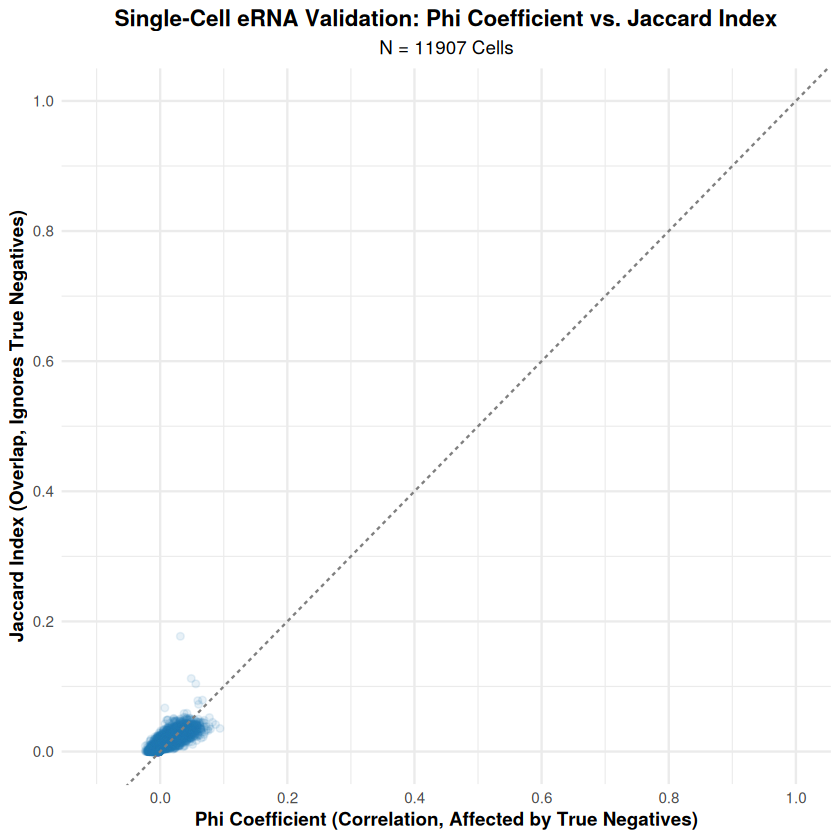

In [128]:
ggplot(results_df, aes(x = Phi, y = Jaccard)) +
    
    # 1. Scatter points with transparency (crucial for large datasets)
    # Using geom_point with high alpha to show point density.
    geom_point(alpha = 0.1, size = 1.5, color = "#1f78b4") + 
    

    
    # 3. Add the identity line (y = x) for comparison
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray50") +
    
    # 4. Define axis limits and labels
    scale_x_continuous(limits = c(-0.1, 1), breaks = seq(0, 1, 0.2)) + 
    scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2)) + 
    
    labs(
        title = "Single-Cell eRNA Validation: Phi Coefficient vs. Jaccard Index",
        subtitle = paste0("N = ", nrow(results_df), " Cells"),
        x = "Phi Coefficient (Correlation, Affected by True Negatives)",
        y = "Jaccard Index (Overlap, Ignores True Negatives)"
    ) +
    
    # 5. Apply a clean theme
    theme_minimal() +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        axis.title = element_text(face = "bold")
    )

In [156]:

contingency_table <- table(c(as.matrix(atac_counts)),c(as.matrix(rna_enhancers)))
contingency_table

   
           0        1
  0 96174047  1356733
  1  3216336    84798

In [157]:
test <- fisher.test(contingency_table)
test


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.855844 1.882031
sample estimates:
odds ratio 
  1.868963 


In [ ]:
# histogram of fisher per cell p-values with ggplot2
library(ggplot2)
fisher_per_cell_test = function(x, y){
    fisher.test(table(x, y))$p.value
}
fisher_per_cell = mapply(fisher_per_cell_test, as.data.frame(rna_enhancers), as.data.frame(atac_counts))



In [152]:
fisher_per_cell_test = function(x, y){
    fisher.test(table(x, y))$p.value
}
fisher_per_cell = mapply(fisher_per_cell_test, as.data.frame(rna_enhancers), as.data.frame(atac_counts))

[1] "Number of cells with significant association (FDR < 0.05): 538 out of 11906"


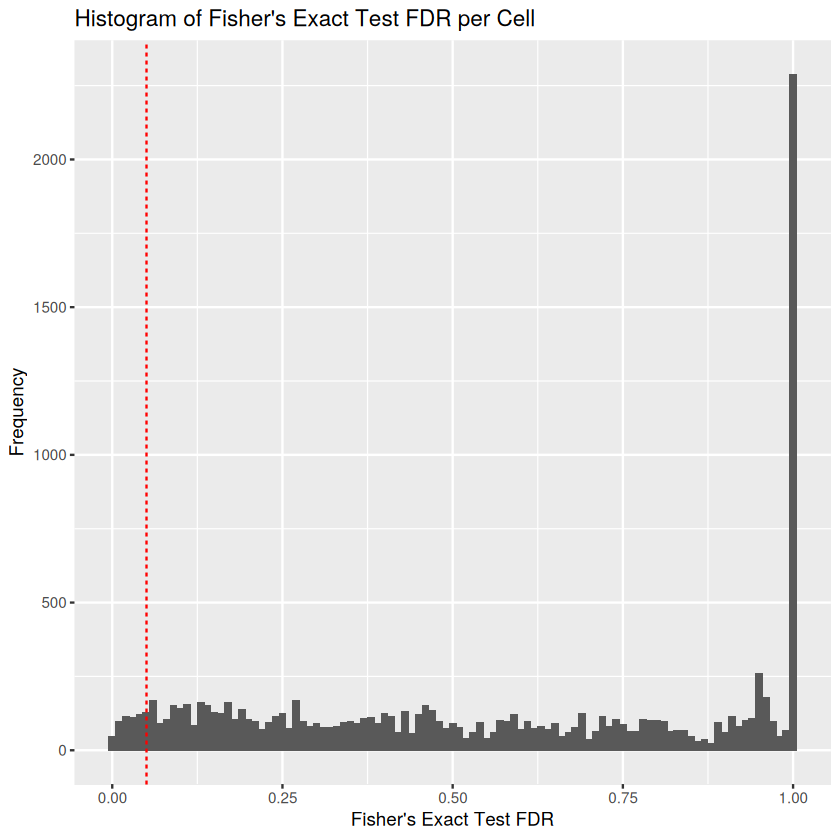

In [160]:
# create a data frame for plotting
fisher_df = data.frame(fdr = p.adjust(fisher_per_cell,method = "fdr"))

# plot the histogram
ggplot(fisher_df, aes(x = fdr)) +
    geom_histogram(binwidth = 0.01) +
    xlab("Fisher's Exact Test FDR") +
    ylab("Frequency") +
    # add line at 0.05 significance level
    geom_vline(xintercept = 0.05, color = "red", linetype = "dashed") +
    ggtitle("Histogram of Fisher's Exact Test FDR per Cell")

#count cells with significant FDR < 0.05
significant_cells = sum(fisher_df$fdr < 0.05)
print(paste0("Number of cells with significant association (FDR < 0.05): ", significant_cells, " out of ", length(fisher_per_cell)))

In [162]:
# histogram of fisher per enhancer p-values with ggplot2
library(ggplot2)
fisher_per_enhancer_test = function(x, y){
    tryCatch(fisher.test(table(x, y))$p.value, error = function(e) NA)
}
fisher_per_enhancer = mapply(fisher_per_enhancer_test, as.data.frame(t(rna_enhancers)), as.data.frame(t(atac_counts)))



[1] "Number of enhancers with significant association (FDR < 0.05): 917 out of 8337"


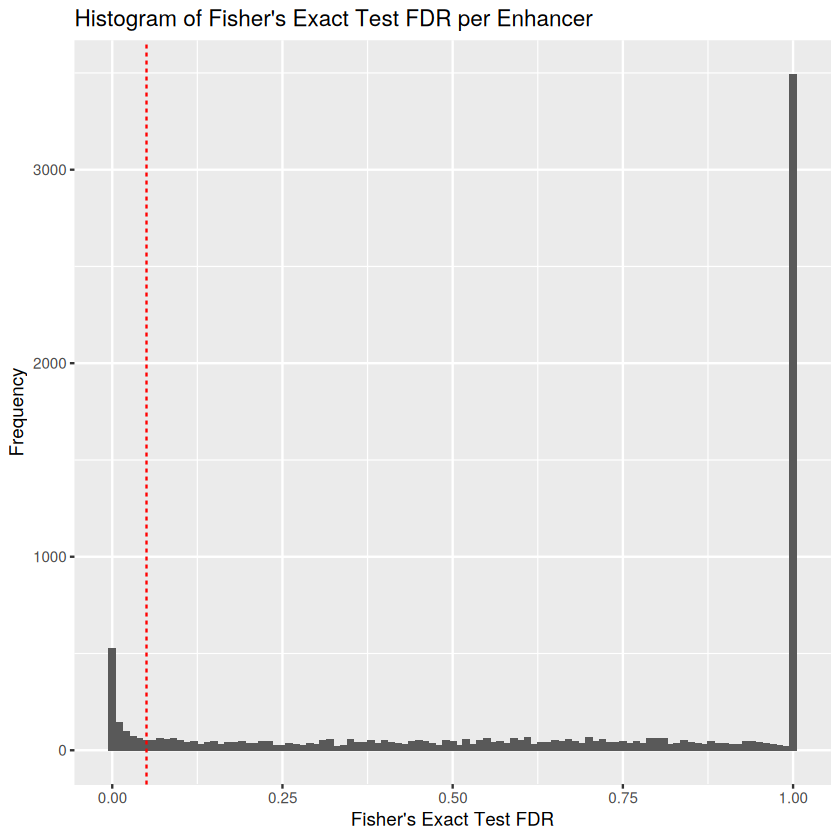

In [164]:
fisher_per_enhancer = na.omit(fisher_per_enhancer)
# create a data frame for plotting
fisher_df = data.frame(fdr = p.adjust(fisher_per_enhancer,method = "fdr"))

# plot the histogram
ggplot(fisher_df, aes(x = fdr)) +
    geom_histogram(binwidth = 0.01) +
    xlab("Fisher's Exact Test FDR") +
    ylab("Frequency") +
    # add line at 0.05 significance level
    geom_vline(xintercept = 0.05, color = "red", linetype = "dashed") +
    ggtitle("Histogram of Fisher's Exact Test FDR per Enhancer")

#count enhancers with significant FDR < 0.05
significant_enhancers = sum(fisher_df$fdr < 0.05)
print(paste0("Number of enhancers with significant association (FDR < 0.05): ", significant_enhancers, " out of ", length(fisher_per_enhancer)))